# Data Preprocessing

**Why Data Preprocessing?**  

If you are going to build a model—whether it's machine learning or deep learning—you must do data cleaning or preprocessing. 🧹  

This includes handling missing values, outliers, scaling, and transformations etc.  

It helps improve model performance and avoids getting stuck.  
Also, it helps create a generalized model. ✅💡🧠

In [ ]:
# import necessary libraries 

# System Libraries
import os

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow.keras.utils import to_categorical

# random
import random

# Pillow
from PIL import Image

# math
import math

# functions
from utils.image_preprocessing import ImagePrePreprocessingData

# computer vision 
import cv2

# shuffle
from sklearn.utils import shuffle

# train and test split 
from sklearn.model_selection import train_test_split

### Image Collection

*Collect all images into one folder and assign clear, correct labels for each image. Make sure everything is well organized ✅🗂️🧠*

In [ ]:
dataPath = '../artifacts/data_ingestion/Embryo_Master_Folder/'

In [6]:
# check the data ingestion or not 

os.listdir(dataPath)

['8-cell Grade A',
 '8-cell Grade B',
 '8-cell Grade C',
 'Blastocyst Grade A',
 'Blastocyst Grade B',
 'Blastocyst Grade C',
 'Error Images',
 'Morula Grade A',
 'Morula Grade B',
 'Morula Grade C']

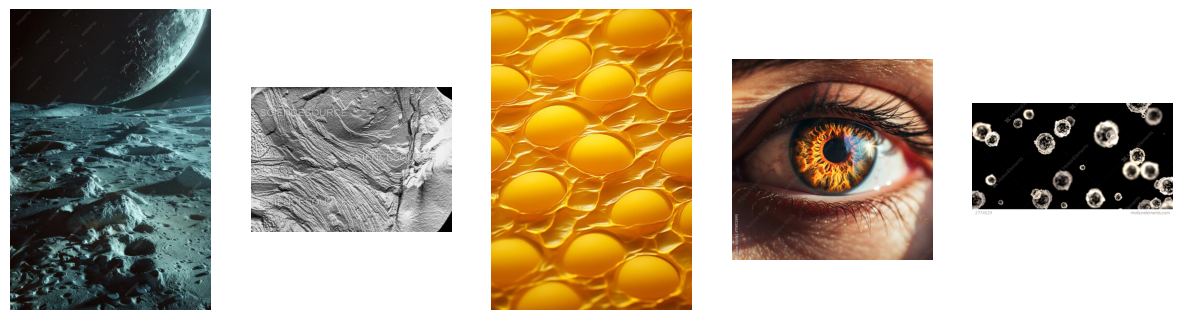

In [ ]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath, 'Error Images')

#### Standard Format .png

- I am using standard .png format because this project is medical-related. I chose .png since it ensures no data loss, which is important for accuracy." 🧠🩺🖼️

In [8]:
for folder in os.listdir(dataPath):
    folder_path = os.path.join(dataPath, folder)
    
    if os.path.isdir(folder_path):  # ✅ Check only folders
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            # ✅ Convert only .jpg or .jpeg
            if os.path.isfile(img_path) and file.lower().endswith((".jpg", ".jpeg", ".webp")):
                try:
                    img = Image.open(img_path).convert("RGB")

                    new_img_path = os.path.splitext(img_path)[0] + ".png"
                    img.save(new_img_path, "PNG")

                    os.remove(img_path)  # 🗑️ Delete original JPG

                except Exception as e:
                    print(f"❌ Error converting {img_path}: {e}")

print("🎉 All .jpg images converted to .png and originals deleted!")

🎉 All .jpg images converted to .png and originals deleted!


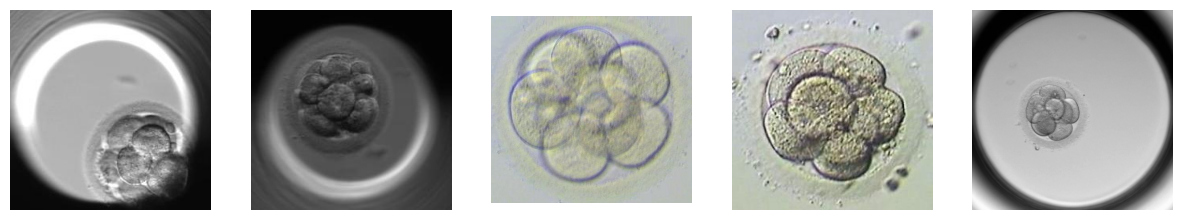

In [ ]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath, '8-cell Grade A')

### Resize

In [10]:
for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):
            
            # image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # 1. Load & Resize
            img = load_img(img_path, target_size=(244, 244))

            # 2. Convert to array
            img_array = img_to_array(img)

            # 3. convert back to image 
            img_ready = array_to_img(img_array)

            # 4. save the  image exiting path 
            img_ready.save(img_path)

print("✅ Image resized and saved back successfully! 🖼️💾")

✅ Image resized and saved back successfully! 🖼️💾


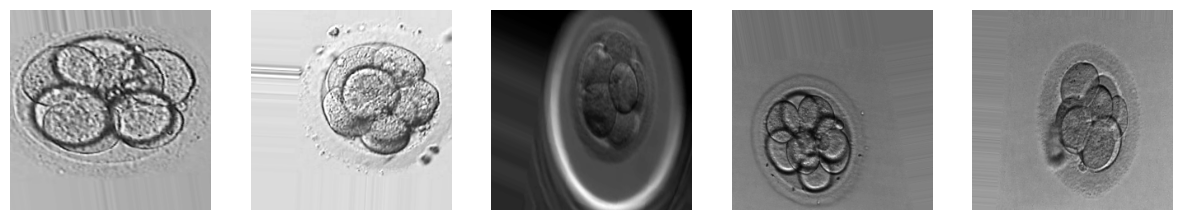

In [35]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath,  "8-cell Grade A")

#### Convert RGB ->
 Grayscale

In [12]:
for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):
    
            # image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # open the image using pillow lib
            img = Image.open(img_path)

            # Convert to Grayscale
            gray_img = img.convert("L")
        
            # existing path
            gray_img.save(img_path)

print("✅ All images converted to grayscale and saved! 🖼️💾")

✅ All images converted to grayscale and saved! 🖼️💾


In [13]:
# Ensure all of then gray scale image 

shapeData = []

for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):
    
            # image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # open the image using pillow lib
            img = Image.open(img_path)

            # Convert to Grayscale
            img_array = np.array(img)

            # Check if the shape matches (244, 244, 3)
            if img_array.shape == (244, 244, 3):
                print(img_path)
        
            shapeData.append(img_array.shape)

set(shapeData)

{(244, 244)}

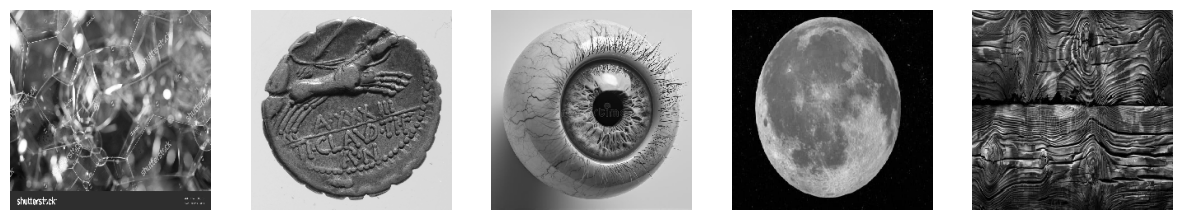

In [ ]:
# visual the image randomly 

ImagePrePreprocessingData.visualImagesRandomly(dataPath,  "Error Images")

#### Data Augmentation

In [ ]:
# 8 cell augmentation A

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade A/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade A/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# 8 cell augmentation B

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade B/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade B/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# 8 cell augmentation C

# target image count 
target_count = 800 

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade C/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/8-cell Grade C/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Blastocyst Grade augmentation A

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade A/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade A/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Blastocyst Grade augmentation B

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade B/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade B/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Blastocyst Grade augmentation C

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade C/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Blastocyst Grade C/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Error Images augmentation C

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Error Images/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Error Images/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Morula Grade augmentation A

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade A/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade A/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Morula Grade augmentation B

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade B/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade B/', target = target_count)

✅ Generated new 800 images.


In [ ]:
# Morula Grade augmentation C

# target image count 
target_count = 800

# existing image count 
image_count = len(os.listdir('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade C/'))

ImagePrePreprocessingData.generateAugmentation('../artifacts/data_ingestion/Embryo_Master_Folder/Morula Grade C/', target = target_count)

✅ Generated new 800 images.


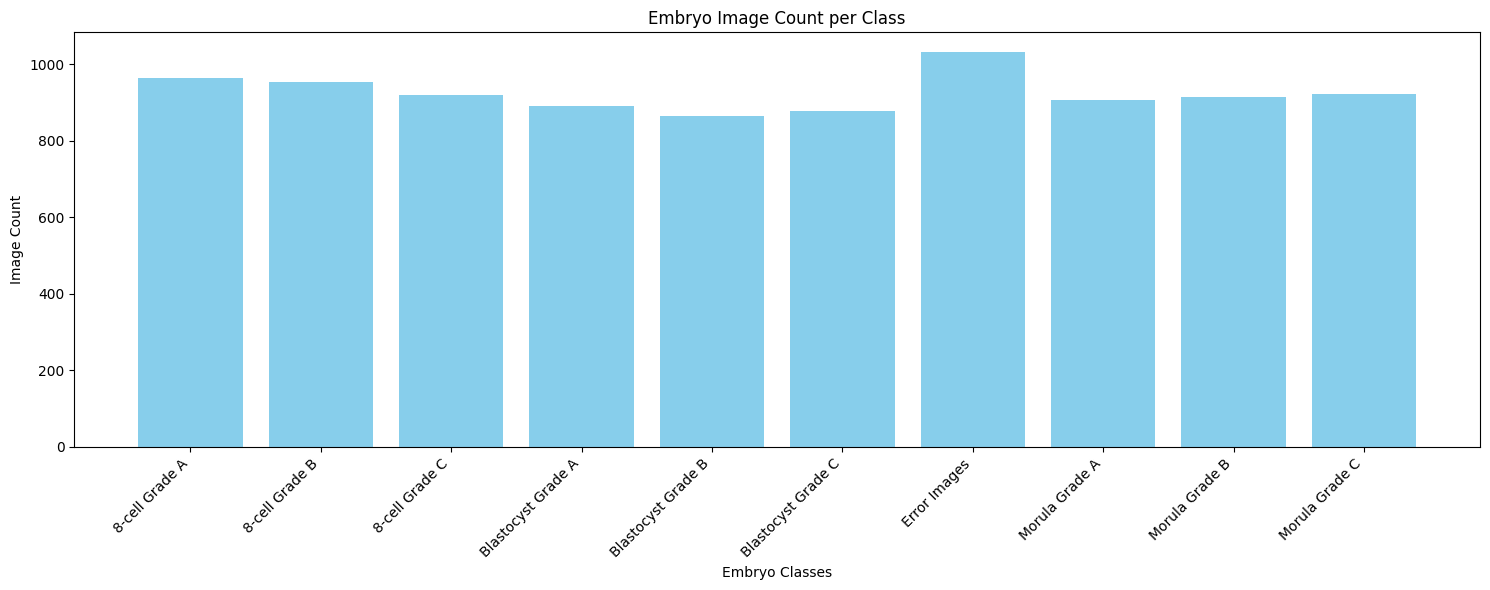

In [ ]:
# Visual the classes count 

base_path = '../artifacts/data_ingestion/Embryo_Master_Folder/'

ImagePrePreprocessingData.VisualClassesCount(base_path)

#### convert to array

In [38]:
X = []
y = []

base_path = '../artifacts/data_ingestion/Embryo_Master_Folder/'

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path):
        label = folder                                            # 📛 Folder name as label

        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, file)

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
# total images 
print(f"✅ Total Images: {X.shape}")

# labels
print(f"🎯 Total Labels: {len(np.unique(y))}")

✅ Total Images: (9245, 244, 244)
🎯 Total Labels: 10


#### Normalization

In [ ]:
X  = X / 255.0  #its range is 0 to 1

#### Split Data (train, test) 

In [67]:
X, y = shuffle(X, y, random_state = 42)

print("✅ Data shuffled successfully 🌀")

✅ Data shuffled successfully 🌀


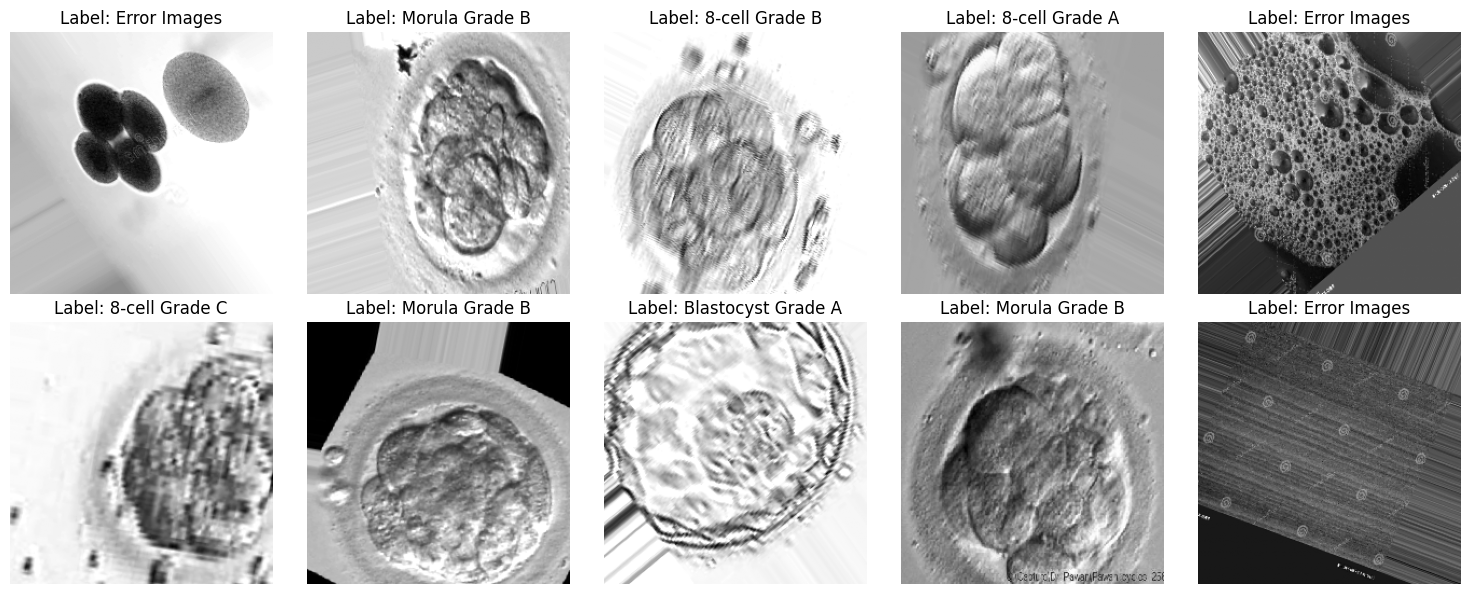

In [ ]:
indices = random.sample(range(len(X)), 10)

ImagePrePreprocessingData.RadomVisual(indices)

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state=42)

In [79]:
X_train.shape

(6471, 244, 244)

In [80]:
X_test.shape

(2774, 244, 244)

In [81]:
y_train.shape

(6471,)

In [82]:
y_test.shape

(2774,)

In [92]:
# Save training dataset 

np.savez('../artifacts/data_ingestion/Preprocessed Dataset/train_data.npz', X_train, X_test)

In [93]:
# Save  test dataset 

np.savez('../artifacts/data_ingestion/Preprocessed Dataset/test_data.npz', X_test, y_test)